# PLOTTING UNIFIED JSON

In [2]:

#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *


data=geopandas.read_file('final/complete.geojson')
data_pop=geopandas.read_file('final/gkz_pop+data.gpkg')


In [2]:
#why do i still  get comma values in legend?
data.sum_PE=data.sum_PE.astype('int')


<AxesSubplot:>

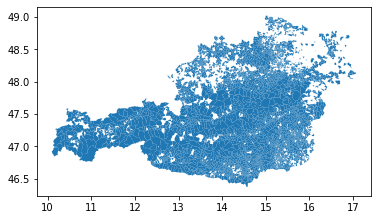

In [3]:
data.plot()

In [3]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

In [54]:
basemap=basemap[(basemap.BL!='Wien')&(basemap.BL!='Vorarlberg')&(basemap.BL!='Burgenland')]

In [5]:
#BLs=basemap.dissolve(by='BL')
#BLs.geometry.boundary.plot()
#BLs.to_file('plotting_data/BL_bounds.gpkg',driver='GPKG')
#GKZ=basemap.dissolve(by='GKZ')
#GKZ.to_file('plotting_data/GKZ_bounds.gpkg',driver='GPKG')


In [4]:
BLs=geopandas.read_file('plotting_data/BL_bounds.gpkg')
GKZ=geopandas.read_file('plotting_data/GKZ_bounds.gpkg')
no_data=BLs.set_index('BL').loc[['Burgenland','Vorarlberg','Wien']]

In [5]:
#add rows to show as nodata
data=data.append(no_data)
data_pop=data_pop.append(no_data)

In [41]:
len(data[data.sum_PE_tot>0])
len(data)

4408

Text(1.042, 0.04, 'no data')

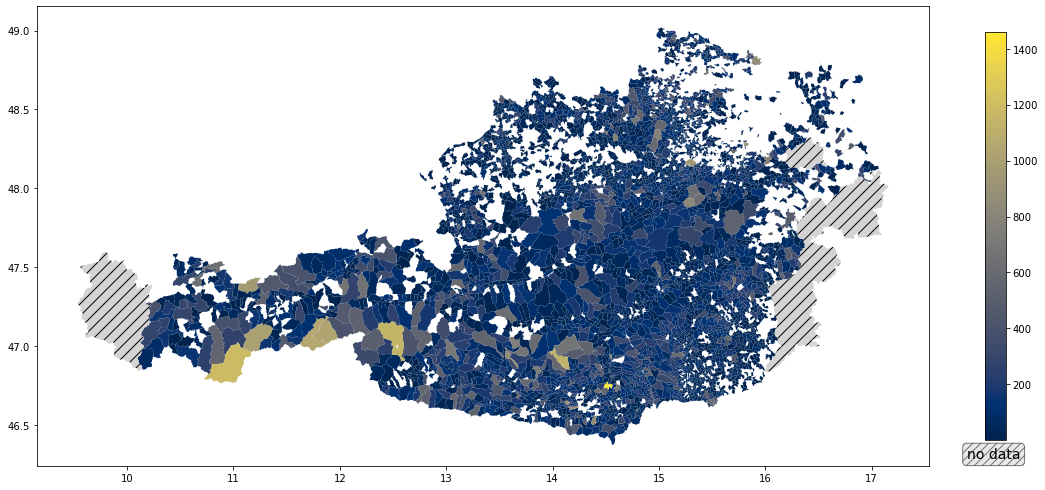

In [86]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
#GKZ.plot(color='grey',ax=ax,alpha=0.2)
data[data.sum_PE_tot>0].plot(column='sum_PE_tot',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})
no_data.plot(color='lightgrey', hatch='//',ax=ax, legend=True)
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)


# KG resolution



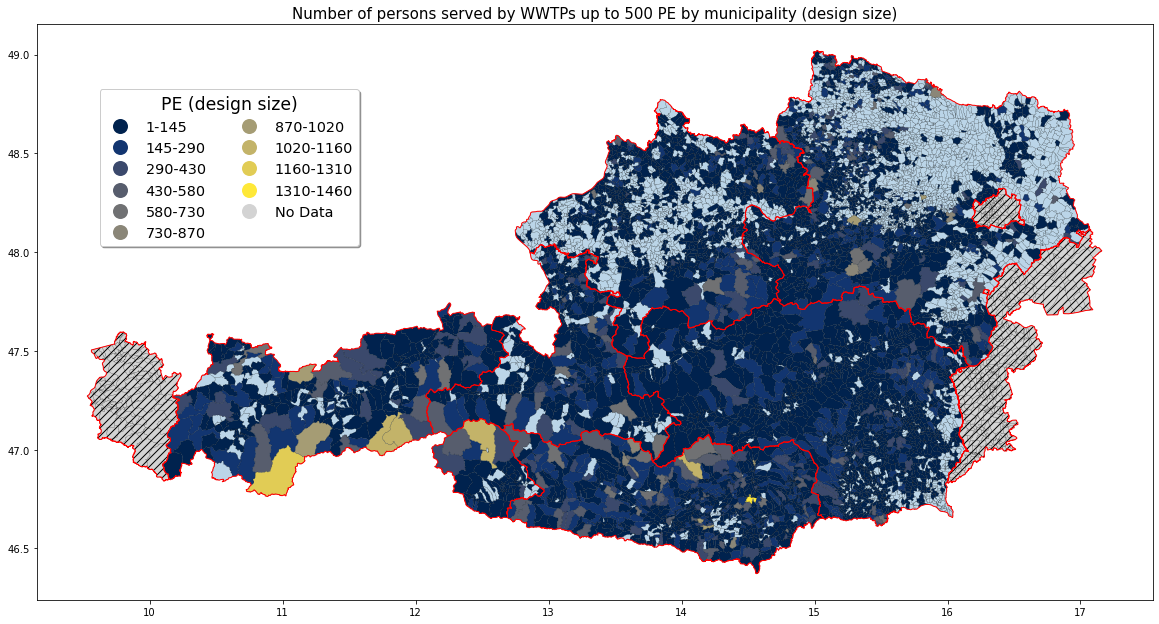

In [9]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('Number of persons served by WWTPs up to 500 PE by municipality (design size)', fontsize=15)
data.plot(column='sum_PE',cmap='cividis', ax=ax, legend=True, scheme='EqualInterval', k=10, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),                     # EqualInterval is good
           legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': 'PE (design size)', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'x-large', 'markerscale':1.5, 'title_fontsize':'xx-large'})                            # cividis good


leg_labes=['1-145','145-290','290-430','430-580','580-730','730-870','870-1020','1020-1160','1160-1310','1310-1460']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

plt.savefig('plots/all_PE.png', bbox_inches='tight' )

Text(1.042, 0.04, 'no data')

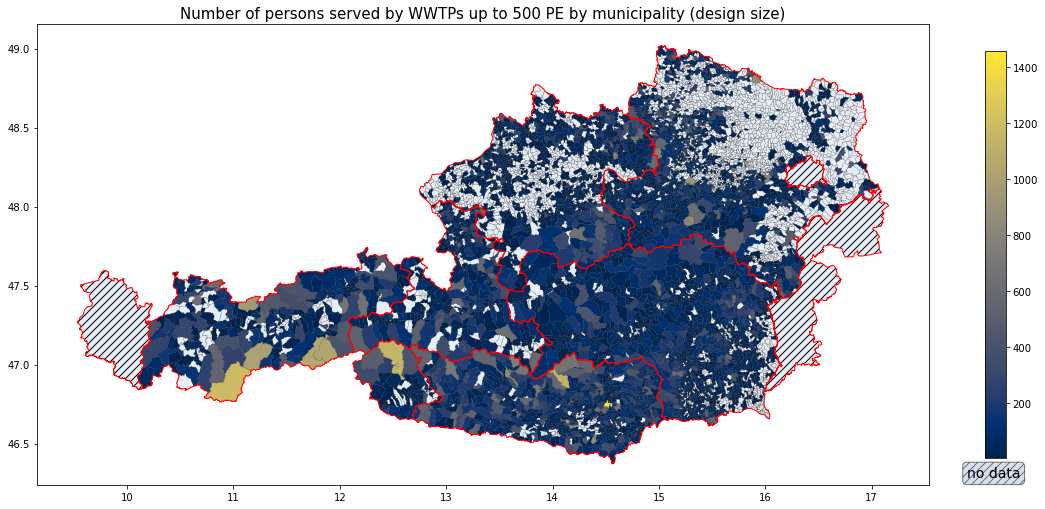

In [88]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
no_data.plot(hatch='///',ax=ax,alpha=0.3,color='lightsteelblue')


ax.set_title('Number of persons served by WWTPs up to 500 PE by municipality (design size)', fontsize=15)
data[data.sum_PE_tot>0].plot(column='sum_PE_tot',cmap='cividis', ax=ax, legend=True, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),legend_kwds={'shrink': 0.25})                         # cividis good

#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)
props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.3, hatch='///')
fig.text(1.042,0.04, 'no data', fontsize=14,verticalalignment='top',bbox=props,transform=ax.transAxes)

#plt.savefig('plots/all_PE.png', bbox_inches='tight' )

In [10]:
#percentage of non-nitriin total
data.PE_nonitri.sum()/data.sum_PE.sum()*100





19.005327206766054

# NON-NITRIFYING


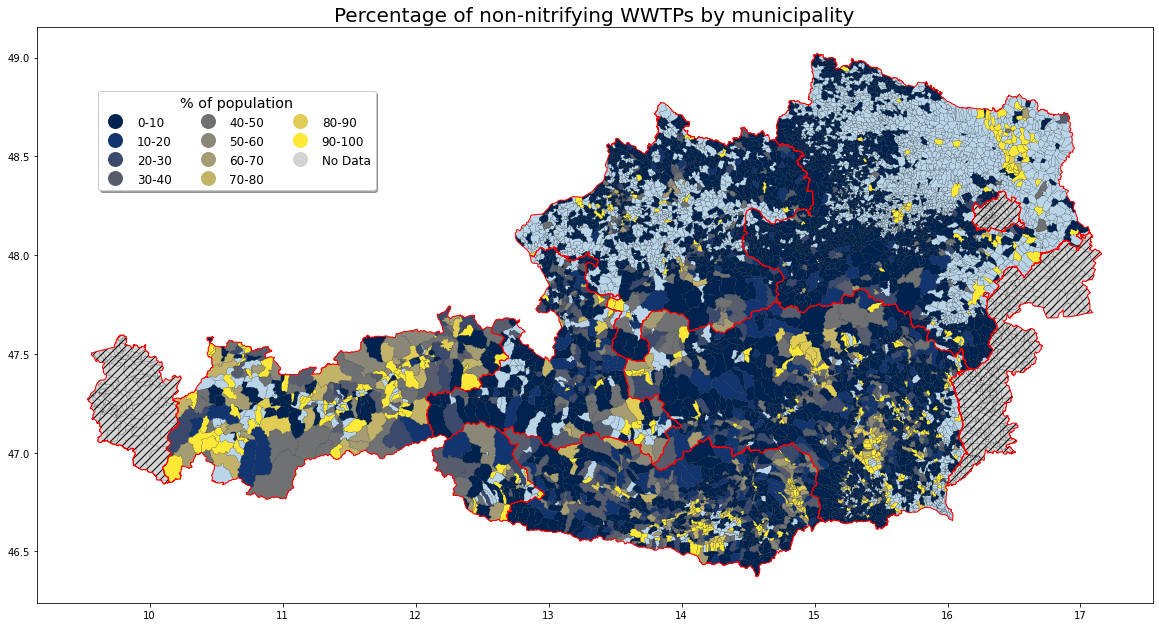

In [11]:
#plot for old infrastructure density. 
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='%no_nitri', ax=ax,legend=True,scheme='user_defined',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},cmap='cividis', k=10,
missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),
legend_kwds={'loc': 'upper left','ncol':3, 'shadow': 'True', 'title': '% of population', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'large', 'markerscale':1.5, 'title_fontsize':'x-large'})                            # cividis good
ax.set_title('Percentage of non-nitrifying WWTPs by municipality', fontsize=20)

leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

plt.savefig('plots/all_nonitri%.png', bbox_inches='tight' )

# PE on POP

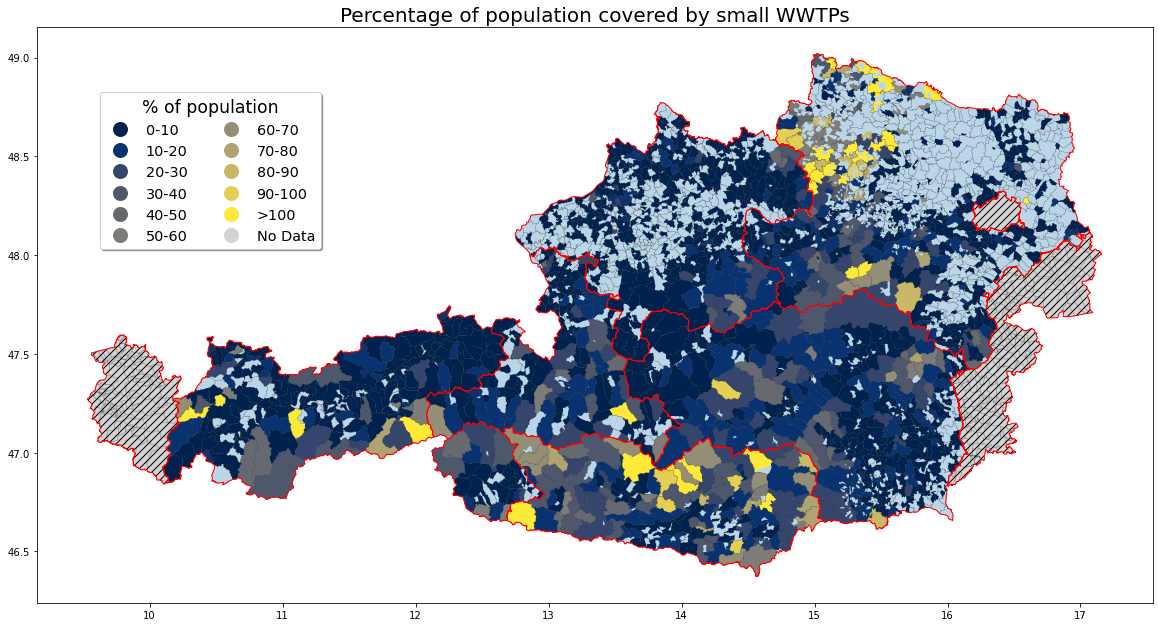

In [12]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data_pop.plot(column='%PEonpop', ax=ax,legend=True,scheme='user_defined',cmap='cividis',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]},k=11,
missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),
legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': '% of population', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'x-large', 'markerscale':1.5, 'title_fontsize':'xx-large'})                            # cividis good
plt.title('percentage of population covered by small'.capitalize()+' WWTPs', fontsize=20)

#plot KG boundaries
GKZ.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)


leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)

plt.savefig('plots/all_PE_pop.png', bbox_inches='tight' )

# NOnitri PE on POP 


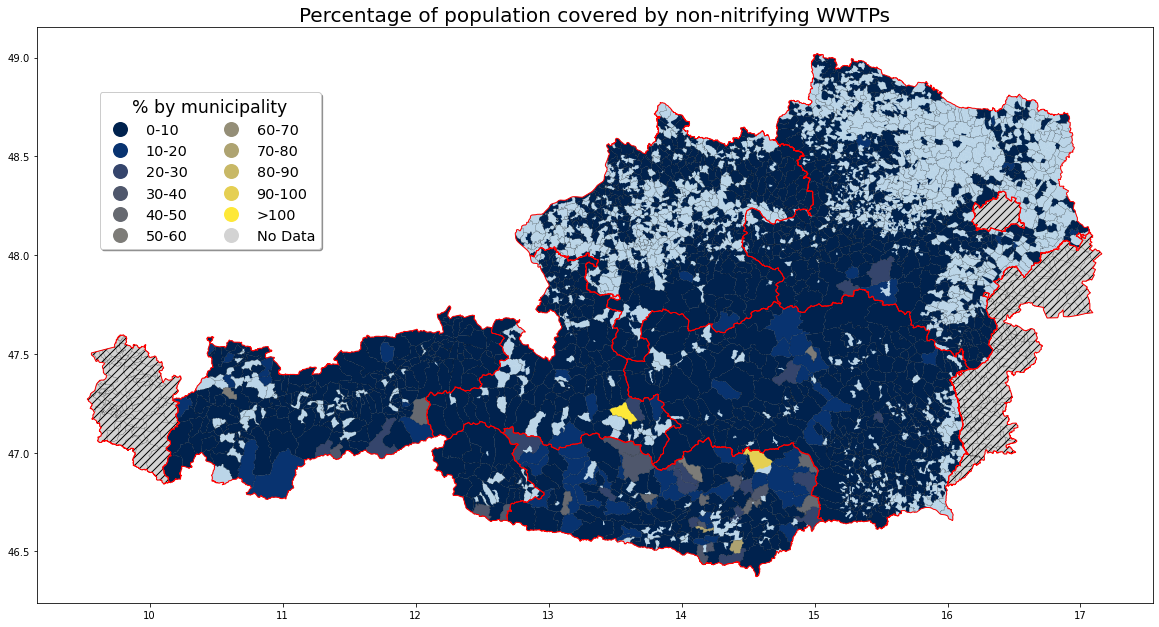

In [13]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data_pop.plot(column='%nonitriPEonpop', ax=ax,legend=True,scheme='user_defined',cmap='cividis',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]},
missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),
legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': '% by municipality', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'x-large', 'markerscale':1.5, 'title_fontsize':'xx-large'})                            # cividis good
ax.set_title('percentage of population covered by non-nitrifying'.capitalize()+' WWTPs', fontsize=20)

#plot KG boundaries
GKZ.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)

plt.savefig('plots/all_nonitri%_pop.png', bbox_inches='tight' )

<AxesSubplot:title={'center':'Distribution of non-nitrifyied PEs by municipality'}>

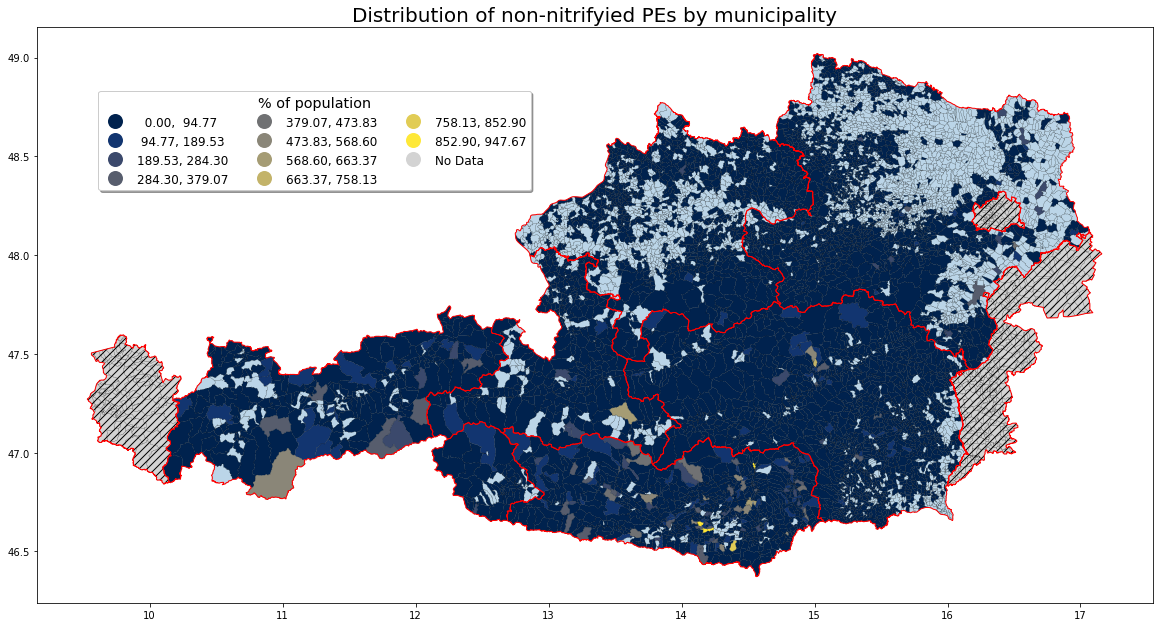

In [14]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='PE_nonitri', ax=ax,legend=True,scheme='equal_interval',cmap='cividis', k=10, missing_kwds = dict(color='lightgrey', label='No Data',hatch='///'),
legend_kwds={'loc': 'upper left','ncol':3, 'shadow': 'True', 'title': '% of population', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'large', 'markerscale':1.5, 'title_fontsize':'x-large'})                            # cividis good
ax.set_title('Distribution of non-nitrifyied PEs by municipality', fontsize=20)

#leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
#leg=ax.get_legend()
#for text, label in zip(leg.get_texts(), leg_labes):
#    text.set_text(label)


#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#plt.savefig('plots/all_nonitri%.png', bbox_inches='tight' )


2 parameters as potentiol of environmental impact : PE sum and size of KG
given this, only carintia shows potential
maybe add further geo analisys on impact
like water bodies in vicinity

In [15]:
distri=data[['KG','PE_nonitri']]

# goal is here to understnad the distribution of nonitri PE
### if widely distributed should be no problem

In [16]:
distri.PE_nonitri.max()

947.6666666666666

<AxesSubplot:ylabel='Frequency'>

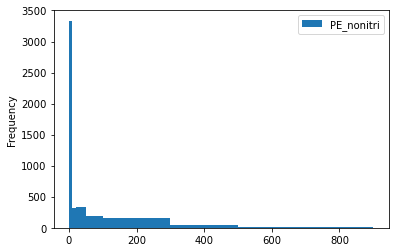

In [17]:
distri.plot(kind='hist', y='PE_nonitri', bins=[0,10,20,50,100,300,500,900])

<AxesSubplot:ylabel='Density'>

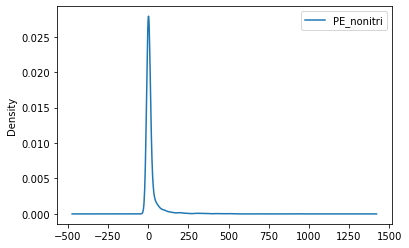

In [18]:
distri.plot(kind='kde',y='PE_nonitri')

In [19]:
data.PE_nonitri.mean()

18.04628450106157